In [25]:
#Inport
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Datos iniclaes
x = [22.0,21.0,23.0,23.0,22.0,22.0] 
y = [3.8,3.9,3.7,3.8,4.0,3.6] 
z = [5.0,6.0,3.0,3.0,3.0,4.0] 
df = pd.DataFrame({"Edad": x, "Promedio": y, "Horas Estudio": z})

print(df)

   Edad  Promedio  Horas Estudio
0  22.0       3.8            5.0
1  21.0       3.9            6.0
2  23.0       3.7            3.0
3  23.0       3.8            3.0
4  22.0       4.0            3.0
5  22.0       3.6            4.0


In [27]:
#Paso 1. Normalizar
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x', 'y', 'z'])

print(scaled_df)

     x     y         z
0  0.5  0.50  0.666667
1  0.0  0.75  1.000000
2  1.0  0.25  0.000000
3  1.0  0.50  0.000000
4  0.5  1.00  0.000000
5  0.5  0.00  0.333333


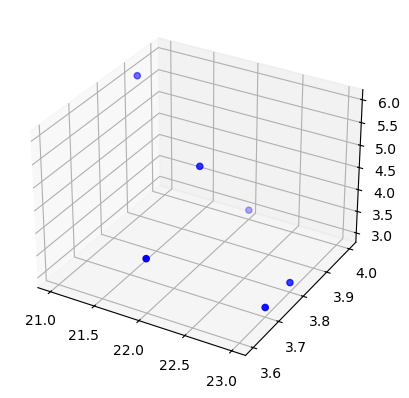

In [7]:
#Grafica puntos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

for row in x:
    asignar.append(colores[0])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()

In [9]:
#Paso 2. centroides iniales
import random

cx = [random.uniform(0,1), random.uniform(0,1)]
cy = [random.uniform(0,1), random.uniform(0,1)]
cz = [random.uniform(0,1), random.uniform(0,1)]


print(pd.DataFrame({"X": cx, "Y": cy, "Z": cz}))


          X         Y         Z
0  0.524774  0.137716  0.946987
1  0.105086  0.499538  0.934117


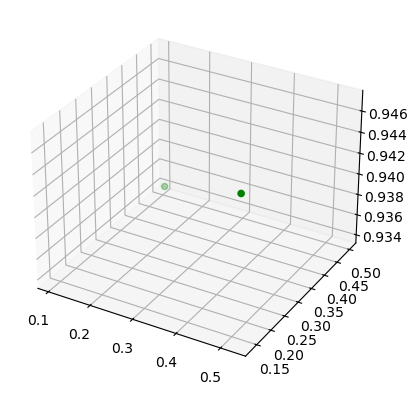

In [11]:
#Grafica de centroides
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


ax1.scatter(cx, cy, cz, c="g", marker='o')

plt.show()

In [19]:
#Paso 3. Distancia inicial Iteración
import math

#Funcion calcular distancia
def calcular_distancia(x_inicial, y_inicial, z_inicial, x_final, y_final, z_final):
    raiz = math.sqrt((x_final-x_inicial)**2+(y_final-y_inicial)**2+(z_final-z_inicial)**2)
    return raiz 

In [31]:
distC1 = [0,0,0,0,0,0]
distC2 = [0,0,0,0,0,0]
cluster = [0,0,0,0,0,0]

for i in range(0, len(scaled_df['x'])):
    distC1[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[0], cy[0], cz[0])
    distC2[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[1], cy[1], cz[1])
    if distC1[i] < distC2[i]:
        cluster[i] = 0
    else:
        cluster[i] = 1

print(pd.DataFrame({"K1": distC1, "K2": distC2, "Cluster": cluster}))

         K1        K2  Cluster
0  0.458740  0.476956        0
1  0.808139  0.279490        1
2  1.065473  1.317466        0
3  1.119765  1.293618        0
4  1.280988  1.130926        1
5  0.629405  0.875464        0


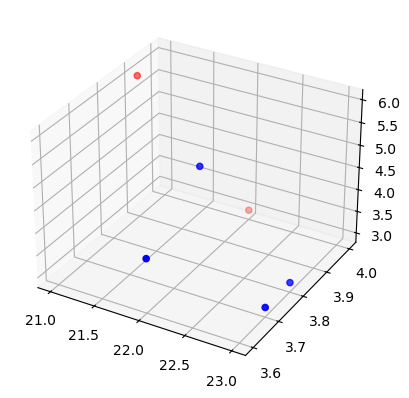

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

for row in cluster:
    asignar.append(colores[row])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()


ITERACIÓN  1
**Centroides**
      X       Y     Z
0  0.75  0.3125  0.25
1  0.25  0.8750  0.50
         K1        K2  Cluster  Cluster anterior
0  0.520833  0.480523        1                 0
1  1.147347  0.572822        1                 1
2  0.359035  1.096871        0                 0
3  0.400195  0.976281        0                 0
4  0.773082  0.572822        1                 1
5  0.408780  0.925150        0                 0


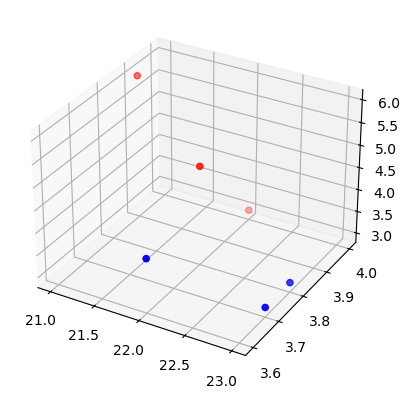

ITERACIÓN  2
**Centroides**
          X     Y         Z
0  0.833333  0.25  0.111111
1  0.333333  0.75  0.555556
         K1        K2  Cluster  Cluster anterior
0  0.694444  0.320349        1                 1
1  1.317030  0.555556        1                 1
2  0.200308  1.001542        0                 0
3  0.320349  0.903098        0                 0
4  0.828225  0.631601        1                 1
5  0.472222  0.799788        0                 0


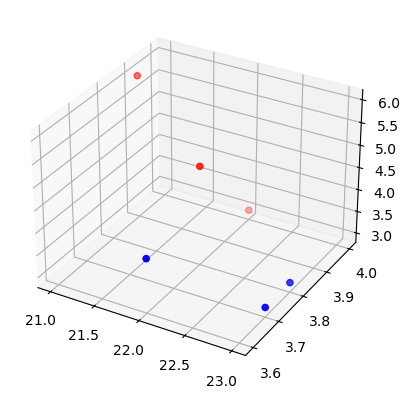

In [35]:
# N iteraciones

def calcular_promedio(scaled_df, cluster, cluster_id):
    sumax = 0.0
    sumay = 0.0
    sumaz = 0.0
    promx = 0.0
    promy = 0.0
    promz = 0.0
    cant = 0
    for i in range(0, len(scaled_df['x'])):
        if(cluster[i]==cluster_id):
            cant = cant+1
            sumax = sumax + scaled_df['x'][i]
            sumay = sumay + scaled_df['y'][i]
            sumaz = sumaz + scaled_df['z'][i]
            
    promx = sumax/cant;
    promy = sumay/cant;
    promz = sumaz/cant;
    
    return promx, promy, promz

ciclo = 1
iteracion = 0;
clusterN = [0,0,0,0,0,0]

while ciclo == 1:
    iteracion = iteracion +1
    print("ITERACIÓN ", iteracion)
    print("**Centroides**")
    k1x, k1y, k1z = calcular_promedio(scaled_df, cluster, 0)
    k2x, k2y, k2z = calcular_promedio(scaled_df, cluster, 1)
    
    cx = [k1x, k2x]
    cy = [k1y, k2y]
    cz = [k1z, k2z]
    
    print(pd.DataFrame({"X": cx, "Y": cy, "Z": cz}))  
    
    for i in range(0, len(scaled_df['x'])):
        distC1[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[0], cy[0], cz[0])
        distC2[i] = calcular_distancia(scaled_df['x'][i], scaled_df['y'][i], scaled_df['z'][i], cx[1], cy[1], cz[1])
        if distC1[i] < distC2[i]:
            clusterN[i] = 0
        else:
            clusterN[i] = 1
        
    print(pd.DataFrame({"K1": distC1, "K2": distC2, "Cluster": clusterN, "Cluster anterior": cluster}))
    
    diferentes = 0
    for i in range(0, len(clusterN)):
        if(cluster[i]!=clusterN[i]):
            diferentes = 1
            break
    if(diferentes == 0):
        ciclo = 0
    else:
        ciclo = 1
        for i in range(0, len(clusterN)):
            cluster[i] = clusterN[i]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')

    colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
    asignar=[]

    for row in cluster:
        asignar.append(colores[row])

    ax1.scatter(x, y, z, c=asignar, marker='o')

    plt.show()